In [1]:
import pandas as pd
from pulp import *
from random import normalvariate

In [4]:
d = {'Supply_Region':['USA', 'Germany', 'Japan', 'Brazil', 'India'], 'Dmd':[2719.6,84.1,1676.8,145.4,156.4]}
v = {'Supply_Region':['USA', 'Germany', 'Japan', 'Brazil', 'India'],
    'USA':[6,13,20,12,22],'Germany':[13,6,14,14,13],'Japan':[20,14,3,21,10], 
    'Brazil':[12,14,21,8,23], 'India':[17,13,9,21,8]}
f = {'Supply_Region':['USA', 'Germany', 'Japan', 'Brazil', 'India'],
    'Low_Cap':[6500,4980,6230,3230,2110], 'High_Cap':[9500,7270,9100,4730,3080]}
p = {'Supply_Region':['USA', 'Germany', 'Japan', 'Brazil', 'India'],
    'Low_Cap':[500,500,500,500,500], 'High_Cap':[1500,1500,1500,1500,1500]}

demand = pd.DataFrame(data = d)
demand = demand.set_index('Supply_Region')

var_cost = pd.DataFrame(data = v)
var_cost = var_cost.set_index('Supply_Region')

fix_cost = pd.DataFrame(data = f)
fix_cost = fix_cost.set_index('Supply_Region')

cap = pd.DataFrame(data = p)
cap = cap.set_index('Supply_Region')

print(fix_cost)
print(demand)
print(cap)
print(var_cost)

               Low_Cap  High_Cap
Supply_Region                   
USA               6500      9500
Germany           4980      7270
Japan             6230      9100
Brazil            3230      4730
India             2110      3080
                  Dmd
Supply_Region        
USA            2719.6
Germany          84.1
Japan          1676.8
Brazil          145.4
India           156.4
               Low_Cap  High_Cap
Supply_Region                   
USA                500      1500
Germany            500      1500
Japan              500      1500
Brazil             500      1500
India              500      1500
               USA  Germany  Japan  Brazil  India
Supply_Region                                    
USA              6       13     20      12     17
Germany         13        6     14      14     13
Japan           20       14      3      21      9
Brazil          12       14     21       8     21
India           22       13     10      23      8


In [14]:
def pulp_model_(fix_cost, var_cost, demand,cap):
    # Initialize, Define Decision Vars., and Objective Function
    model = LpProblem("Capacitated Plant Location Model", LpMinimize)
    
    loc = ['USA', 'Germany', 'Japan', 'Brazil', 'India']
    size = ['Low_Cap','High_Cap']
    
    x = LpVariable.dicts("production", [(i,j) for i in loc for j in loc],
                         lowBound=0, upBound=None, cat='Continuous')
    y = LpVariable.dicts("plant", 
                         [(i,s) for s in size for i in loc], cat='Binary')
    
    
    model += (lpSum([fix_cost.loc[i,s] * y[(i,s)] for s in size for i in loc])
              + lpSum([(var_cost.loc[i,j]+normalvariate(0.5,0.5)) * x[(i,j)] for i in loc for j in loc]))

    # Define the constraints
    for j in loc:
        rd = normalvariate(0, demand.loc[j,'Dmd']*.05)
        model += lpSum([x[(i, j)] for i in loc]) == (demand.loc[j,'Dmd']+rd)
    for i in loc:
        model += lpSum([x[(i, j)] for j in loc]) <= lpSum([cap.loc[i,s] * y[i,s] 
                                                           for s in size])
    model.solve()
    o = {}
    for i in loc:
        o[i] = value(lpSum([x[(i,j)] for j in loc]))
    o['Obj'] = value(model.objective)
    return(o)

output = []
for i in range(100):
    output.append(pulp_model_(fix_cost, var_cost, demand, cap))
    
df = pd.DataFrame(output)

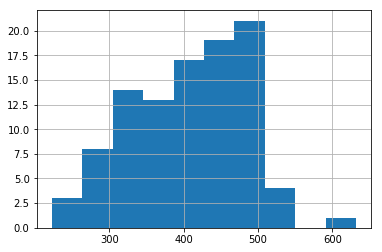

In [16]:
import matplotlib.pyplot as plt
df['India'].hist()

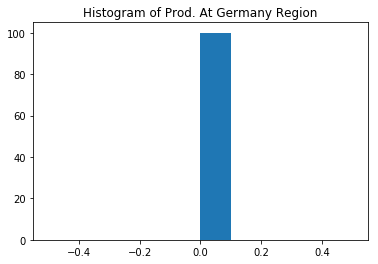

In [17]:
plt.title('Histogram of Prod. At Germany Region')

# Histogram of Germany production
plt.hist(df['Germany'])
plt.show()

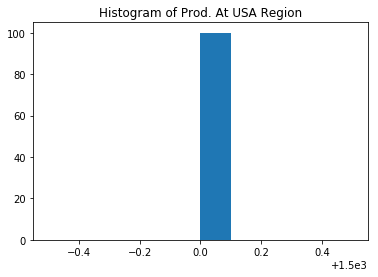

In [18]:
plt.title('Histogram of Prod. At USA Region')

# Histogram of Germany production
plt.hist(df['USA'])
plt.show()

In [ ]:
plt.title('Histogram of Prod. At Japan Region')

# Histogram of Germany production
plt.hist(df['Japan'])
plt.show()